
# Project: European Soccer Analysis
***

## Table of Contents

* <a href="#intro">Introduction</a>
* <a href="#wrangling">Data Wrangling</a>
* <a href="#eda">Exploratory Data Analysis</a>
    * <a href="#res1">Q1. Home Game Advantages</a>
        * <a href="#ob1">Observation No.1</a>
    * <a href="#res2">Q2. Ranks by Average Goal Scores</a>
        * <a href="#limit">Limitation</a>
        * <a href="#ob2">Observation No.2</a>
    * <a href="#res3">Q3. The More Games, The Better Scores??</a>
        * <a href="#ob3">Observation No.3</a>
    * <a href="#res4">Q4. Inactive Players</a>
        * <a href="#ob4">Observation No.4</a>
    * <a href="#res5">Q5. Physical Conditions Enhance Players' Abilities?</a>
        * <a href="#ob5">Observation No.5</a>
* <a href="#conc">Conclusions</a>



***

<a id='intro'></a>
> ## Introduction

> **About this Dataset**

> - The ultimate European Soccer database for data analysis and machine learning

> **What you get**

> - +25,000 matches

> - +10,000 players

> - 11 European Countries with their lead championship

> - Seasons 2008 to 2016

> - Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates

> - Team line up with squad formation (X, Y coordinates)

> - Betting odds from up to 10 providers

> - Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 matches


> **Exploring the data**

> - Q1. I'd like to know how much more is home teams likely to win over away teams.

> - Q2. Which country scores more in average per game?

> - Q3. If a team played more games then do they score more, or the other way around?

> - Q4. Why some players have no games?

> - Q5. Do Goalkeepers actually tend to be taller and bigger than other players?


In [1]:
import pandas as pd
import numpy as np
import sqlite3 as sq
import sqlalchemy
import time
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (12.0, 10.0)

Populating the interactive namespace from numpy and matplotlib


In [2]:
def call_table(table):
    """ 1) This is a query to get whole data from each tables.
        2) It returns a dataframe with data of all tables.
    """
    
    query = "select * from {}".format(table)
    
    return(pd.read_sql_query(query, con))

In [3]:
def check_null_value(df):
    """ 1) After checking missing values of dataframe, and then get rid of the columns with Null values.
        2) Returning a new dataframe with only valid values.
    """
    
    cc = 0
    rr = 0
    cnt_df = len(df.columns)
    cnt_r_df = df.shape[0]
    
    print("There are {} rows in this dataset.\n".format(cnt_r_df))
    
    
    # cleaning null-columns
    clean_df = df.dropna(axis=1, how='any')
    
    cnt_cl_df = len(clean_df.columns)
    cc = cnt_df - cnt_cl_df
    if cc > 0:
        print("{} columns with null values have been removed.".format(cc))

    # cleaning null-rows
    clean_df = clean_df.drop_duplicates(keep='first')
    
    cnt_r_cl_df = clean_df.shape[0]
    rr =  cnt_r_df - cnt_r_cl_df
    if rr > 0:
        print("{} of duplicated rows.".format(rr))
    
    return clean_df

In [4]:
def check_null_value_by_row(df):
    """
    After checking missing values of called dataframe, and then deleting the null rows.
    Returning a new dataframe with valid values.
    """
    
    rr = 0
    dr = 0
    cnt_r_df = df.shape[0]
    
    print("There are {} rows in this dataset.\n".format(cnt_r_df))
    
    
    # cleaning null-rows
    clean_df = df.dropna(axis=0, how='any')
    
    cnt_r_cln_df = clean_df.shape[0]
    rr = cnt_r_df - cnt_r_cln_df
    if rr > 0:
        print("{} rows with null values have been removed.".format(rr))

    # cleaning duplicated-rows
    clean_df1 = clean_df.drop_duplicates(keep='first')
    
    dr =  cnt_r_cln_df - clean_df1.shape[0]
    if dr > 0:
        print("{} of duplicated rows.".format(dr))
    
    return clean_df1

In [5]:
def api_to_name(api_df, name_df, key_col):
    """ 1) Merging two dataframes on the key column(key_col).
        2) The key column should have the same name in both dataframes when calling this function.
        3) name_df should have only two columns: name_df.columns = ['key_col','adding_col']
    """
    
    merged_df = pd.merge(left=api_df, right=name_df, on=key_col, how='left')
    merged_df[key_col] = merged_df[name_df.columns[-1]]
    
    return merged_df.iloc[:,:-1]

In [6]:
start_sec = time.time()

# Read sqlite query results into a pandas DataFrame
con = sq.connect("database.sqlite")
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", con)
sql = pd.read_sql_query("select * from sqlite_sequence", con)

# whole_df is a joined dataframe of all tables
whole_df = sql['name'].apply(call_table)

end_sec = time.time()
print("It took {} seconds for excuting queries!".format(np.round(end_sec - start_sec, 1)))


It took 22.8 seconds for excuting queries!


In [7]:
# Dividing the dataframe(whole_df) into seven individual dataframes;
#  1) df_team
#  2) df_country
#  3) df_league
#  4) df_match
#  5) df_player
#  6) df_player_attributes
#  7) df_team_attributes

df_team = whole_df[0]
df_country = whole_df[1]
df_league = whole_df[2]
df_match = whole_df[3]
df_player = whole_df[4]
df_player_attributes = whole_df[5]
df_team_attributes = whole_df[6]


***

<a id='wrangling'></a>
## Data Wrangling

> ## **Dataframe: df_team**

In [8]:
df_team.info()
print('\n')
df_team.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB




,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [9]:
# Filtering rows with Null-values on 'team_fifa_api_id'
# These teams with no team_fifa_api_id are still needed for merging dataframes for later.
df_no_fifa_api = df_team[df_team["team_fifa_api_id"].isnull()]
print(df_no_fifa_api)


# 'df_team_api_id' is a new dataframe with no Null-values
df_team_api_id = df_team.dropna(axis=1)
print(df_team_api_id.info())


# change the datatype of "team_fifa_api_id" from float64 to int64
# df_team['team_fifa_api_id'] = df_team['team_fifa_api_id'].astype(int)
# print(df_team.info())

        id  team_api_id  team_fifa_api_id                team_long_name  \
8        9         7947               NaN                 FCV Dender EH   
14      15         4049               NaN                        Tubize   
170  26561         6601               NaN                   FC Volendam   
204  34816       177361               NaN  Termalica Bruk-Bet Nieciecza   
208  35286         7992               NaN                      Trofense   
213  35291        10213               NaN                       Amadora   
223  36248         9765               NaN                  Portimonense   
225  36723         4064               NaN                      Feirense   
232  38789         6367               NaN              Uniao da Madeira   
233  38791       188163               NaN                       Tondela   
298  51606         7896               NaN                        Lugano   

    team_short_name  
8               DEN  
14              TUB  
170             VOL  
204        

> ## **Dataframe: df_country**

In [10]:
df_country.info()
print('\n')
df_country.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes




,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


> ## **Dataframe: df_league**

In [11]:
df_league.info()
print('\n')
df_league.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
id            11 non-null int64
country_id    11 non-null int64
name          11 non-null object
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes




,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [12]:
# Joining dataframes of leagues + countries.

league_info = pd.merge(left=df_league, right=df_country, on='id', how='left')
league_info.rename(columns={"name_x":"league", "name_y":"country"}, inplace=True)
league_info

,id,country_id,league,country
0,1,1,Belgium Jupiler League,Belgium
1,1729,1729,England Premier League,England
2,4769,4769,France Ligue 1,France
3,7809,7809,Germany 1. Bundesliga,Germany
4,10257,10257,Italy Serie A,Italy
5,13274,13274,Netherlands Eredivisie,Netherlands
6,15722,15722,Poland Ekstraklasa,Poland
7,17642,17642,Portugal Liga ZON Sagres,Portugal
8,19694,19694,Scotland Premier League,Scotland
9,21518,21518,Spain LIGA BBVA,Spain


> ## **Dataframe: df_match**
**European matches' Information from 2008/2009 to 2015/2016**

In [13]:
df_match.info()
print('\n')
print(df_match.columns)
print('\n')
df_match.head()


# Checking all columns whether it has null values or not by calling func:check_null_value.
df_match = check_null_value(df_match)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=115)


There are 25979 rows in this dataset.

104 columns with null values have been removed.


***
<a id='eda'></a>
## Exploratory Data Analysis

In [14]:
# Merging two dataframes of df_match and df_league
# Call the function: api_to_name(left df, right df, key_column)
df_match_new = api_to_name(df_match, df_league, "country_id")
df_match_new.rename(columns={'country_id':'league'}, inplace=True)


# Call the function: api_to_name(left df, right df, key_column)
# It is for matching 'home_team_api_id' with characters to recognize easily.
df_match_new.rename(columns={'home_team_api_id':'team_api_id'}, inplace=True)
df_match_new = api_to_name(df_match_new, df_team[["team_api_id","team_long_name"]], "team_api_id")
df_match_new.rename(columns={'team_api_id':'home_team'}, inplace=True)


# Call the function:api_to_name(left df, right df, key_column)
# It is for matching 'away_team_api_id' with characters to recognize easily.
df_match_new.rename(columns={'away_team_api_id':'team_api_id'}, inplace=True)
df_match_new = api_to_name(df_match_new, df_team[["team_api_id","team_long_name"]], "team_api_id")
df_match_new.rename(columns={'team_api_id':'away_team'}, inplace=True)


# Dropping some columns of the dataframe(df_match) those don't seem to be meaningful.
df_match_new.drop(['id_x','league_id','stage','match_api_id','id_y'], axis=1, inplace=True, errors='ignore')
df_match_new.head()


,league,season,date,home_team,away_team,home_team_goal,away_team_goal
0,Belgium Jupiler League,2008/2009,2008-08-17 00:00:00,KRC Genk,Beerschot AC,1,1
1,Belgium Jupiler League,2008/2009,2008-08-16 00:00:00,SV Zulte-Waregem,Sporting Lokeren,0,0
2,Belgium Jupiler League,2008/2009,2008-08-16 00:00:00,KSV Cercle Brugge,RSC Anderlecht,0,3
3,Belgium Jupiler League,2008/2009,2008-08-17 00:00:00,KAA Gent,RAEC Mons,5,0
4,Belgium Jupiler League,2008/2009,2008-08-16 00:00:00,FCV Dender EH,Standard de Liège,1,3


***

<a id='res1'></a>
> # < Research Question 1: Home Game Advantages>

> **Q. I want to analyze that whether there actually are home game advatages or not?**

> **Q. How much is Home Winning Rate different depends on countries?**

In [15]:
df_match_home = df_match_new.copy()

# Categorizing Won-or-Lost on the point of home team's side. 
df_match_home['goal_dif'] = df_match_home['home_team_goal']-df_match_home['away_team_goal']
df_match_home['W/L_of_home'] = df_match_home['goal_dif'].apply(lambda x:'WIN' if x>0 else ('TIE' if x==0 else 'LOST'))


# Grouping teams and add up all game results over the period.
df_match_home = df_match_home.groupby(['league','W/L_of_home']).count()
df_match_home = df_match_home[['home_team']]
df_match_home.rename(columns={'home_team':'counts'}, inplace=True)
df_match_home.head()


counts
league                 W/L_of_home        
Belgium Jupiler League LOST            493
                       TIE             425
                       WIN             810
England Premier League LOST            867
                       TIE             783

In [16]:
df_home_wining = df_match_home.unstack().reset_index()
df_home_wining

league counts           
W/L_of_home                             LOST  TIE   WIN
0              Belgium Jupiler League    493  425   810
1              England Premier League    867  783  1390
2                      France Ligue 1    822  859  1359
3               Germany 1. Bundesliga    744  597  1107
4                       Italy Serie A    814  796  1407
5              Netherlands Eredivisie    696  581  1171
6                  Poland Ekstraklasa    525  525   870
7            Portugal Liga ZON Sagres    611  533   908
8             Scotland Premier League    617  447   760
9                     Spain LIGA BBVA    851  704  1485
10           Switzerland Super League    426  346   650

In [17]:
# Computing winning rate for home games.
total_match = {('league',''):'Average', ('counts','LOST'):df_home_wining['counts'].sum()[0],\
               ('counts','TIE'):df_home_wining['counts'].sum()[1],\
               ('counts','WIN'):df_home_wining['counts'].sum()[2]}

df_home_wining = df_home_wining.append(total_match, ignore_index=True)

home_win = df_home_wining['counts']['WIN']
home_tie = df_home_wining['counts']['TIE']
home_lost = df_home_wining['counts']['LOST']

df_home_wining['home_win_rate'] = home_win/(home_lost+home_tie+home_win)*100

result = df_home_wining.sort_values(['home_win_rate'], ascending=[0])
ranks = list(range(1, df_home_wining.shape[0]+1))
result['rank'] = ranks
result.set_index('rank', inplace=True)
result

league counts              home_win_rate
W/L_of_home                             LOST   TIE    WIN              
rank                                                                   
1                     Spain LIGA BBVA    851   704   1485     48.848684
2              Netherlands Eredivisie    696   581   1171     47.834967
3              Belgium Jupiler League    493   425    810     46.875000
4                       Italy Serie A    814   796   1407     46.635731
5                             Average   7466  6596  11917     45.871666
6              England Premier League    867   783   1390     45.723684
7            Switzerland Super League    426   346    650     45.710267
8                  Poland Ekstraklasa    525   525    870     45.312500
9               Germany 1. Bundesliga    744   597   1107     45.220588
10                     France Ligue 1    822   859   1359     44.703947
11           Portugal Liga ZON Sagres    611   533    908     44.249513
12            Scotland Premier League    617   447    760     41.666667

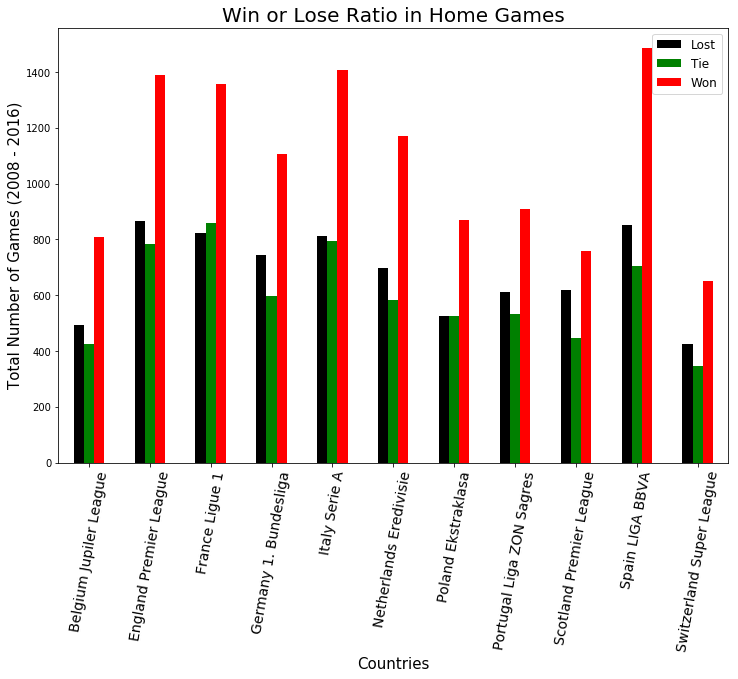

In [18]:
colrs = ['Black','Green','Red']
df_match_home.unstack().plot(kind='bar', figsize=(12,8), color=colrs)
plt.title('Win or Lose Ratio in Home Games', size=20)
plt.ylabel('Total Number of Games (2008 - 2016)', size=15)
plt.xlabel('Countries', size=15)
plt.legend(('Lost','Tie','Won'), fontsize=12)
plt.xticks(rotation=80, fontsize=14)
plt.show();

<a id='ob1'></a>
> ## Observation #1:

> **1) Teams of some countries like Spain, Netherlands, Belgium, Italy have higher possibility to win when they play at home ground than average.**

> **2) Teams of Scotland and Switzerland don't seem to be affected by home advantages much.**

***

<a id='res2'></a>
> # < Research Question 2: Ranks by Average Goal Scores >

> **Q. Analysis of Average Goals by Countries(Leagues) over the period from 2008 to 2016**

In [19]:
df_match_new.head()

,league,season,date,home_team,away_team,home_team_goal,away_team_goal
0,Belgium Jupiler League,2008/2009,2008-08-17 00:00:00,KRC Genk,Beerschot AC,1,1
1,Belgium Jupiler League,2008/2009,2008-08-16 00:00:00,SV Zulte-Waregem,Sporting Lokeren,0,0
2,Belgium Jupiler League,2008/2009,2008-08-16 00:00:00,KSV Cercle Brugge,RSC Anderlecht,0,3
3,Belgium Jupiler League,2008/2009,2008-08-17 00:00:00,KAA Gent,RAEC Mons,5,0
4,Belgium Jupiler League,2008/2009,2008-08-16 00:00:00,FCV Dender EH,Standard de Liège,1,3


In [20]:
df_match_avg_goal = df_match_new.copy()

df_match_avg_goal['total_goal'] = df_match_avg_goal['home_team_goal'] + df_match_avg_goal['away_team_goal']

df_match_avg_goal['date'] = pd.to_datetime(df_match_avg_goal['date'])
df_match_avg_goal.set_index(pd.DatetimeIndex(df_match_avg_goal['date']), inplace=True)

df_match_avg_goal = df_match_avg_goal.groupby(['league']).resample('2W').mean()
df_match_avg_goal = df_match_avg_goal[['total_goal']]
avg_goal_by_league = (df_match_avg_goal.unstack()).transpose()
avg_goal_by_league.head()

league                 Belgium Jupiler League  England Premier League  \
           date                                                         
total_goal 2008-07-20                     NaN                     NaN   
           2008-08-03                     NaN                     NaN   
           2008-08-10                     NaN                     NaN   
           2008-08-17                    2.75                     3.2   
           2008-08-24                     NaN                     NaN   

league                 France Ligue 1  Germany 1. Bundesliga  Italy Serie A  \
           date                                                               
total_goal 2008-07-20             NaN                    NaN            NaN   
           2008-08-03             NaN                    NaN            NaN   
           2008-08-10            2.40                    NaN            NaN   
           2008-08-17             NaN               3.222222            NaN   
           2008-08-24            2.15                    NaN            NaN   

league                 Netherlands Eredivisie  Poland Ekstraklasa  \
           date                                                     
total_goal 2008-07-20                     NaN                 NaN   
           2008-08-03                     NaN                 NaN   
           2008-08-10                     NaN               2.000   
           2008-08-17                     NaN                 NaN   
           2008-08-24                     NaN               2.375   

league                 Portugal Liga ZON Sagres  Scotland Premier League  \
           date                                                            
total_goal 2008-07-20                       NaN                      NaN   
           2008-08-03                       NaN                      NaN   
           2008-08-10                       NaN                 2.000000   
           2008-08-17                       NaN                      NaN   
           2008-08-24                      2.25                 2.153846   

league                 Spain LIGA BBVA  Switzerland Super League  
           date                                                   
total_goal 2008-07-20              NaN                  3.250000  
           2008-08-03              NaN                  2.066667  
           2008-08-10              NaN                       NaN  
           2008-08-17              NaN                  2.900000  
           2008-08-24              NaN                       NaN

In [21]:
avg_score = avg_goal_by_league.copy()
avg_score.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 410 entries, (total_goal, 2008-07-20 00:00:00) to (total_goal, 2016-05-29 00:00:00)
Data columns (total 11 columns):
Belgium Jupiler League      127 non-null float64
England Premier League      166 non-null float64
France Ligue 1              164 non-null float64
Germany 1. Bundesliga       151 non-null float64
Italy Serie A               157 non-null float64
Netherlands Eredivisie      155 non-null float64
Poland Ekstraklasa          139 non-null float64
Portugal Liga ZON Sagres    163 non-null float64
Scotland Premier League     170 non-null float64
Spain LIGA BBVA             162 non-null float64
Switzerland Super League    161 non-null float64
dtypes: float64(11)
memory usage: 39.7+ KB


In [22]:
# Dropping weeks with Null_values for all teams didn't have any game.

avg_score = avg_score.dropna(axis=0, how='all')
avg_score.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 368 entries, (total_goal, 2008-07-20 00:00:00) to (total_goal, 2016-05-29 00:00:00)
Data columns (total 11 columns):
Belgium Jupiler League      127 non-null float64
England Premier League      166 non-null float64
France Ligue 1              164 non-null float64
Germany 1. Bundesliga       151 non-null float64
Italy Serie A               157 non-null float64
Netherlands Eredivisie      155 non-null float64
Poland Ekstraklasa          139 non-null float64
Portugal Liga ZON Sagres    163 non-null float64
Scotland Premier League     170 non-null float64
Spain LIGA BBVA             162 non-null float64
Switzerland Super League    161 non-null float64
dtypes: float64(11)
memory usage: 36.0+ KB


***

<a id='limit'></a>
> # Limitation: 

> **1) NaN_values here mean that the team didn't have any game during the weeks.**

> **2) Therefore, if we filled NaN_values with 0(zero value) then it affects the averages because it would count as the games with no-goal.**

> **3) After dropping Null_values by individual columns, each column's statistic describe data is combined into a dataframe of whole countries.**


In [23]:
# Dropping all Null-values for each team.
# And then merging all teams' statistics result to compare it each other.

# Create a new dataframe for getting describes from all countries without Null-values.
desc_avg_goals = pd.DataFrame()

avg_Bel = avg_score[['Belgium Jupiler League']]
avg_Bel = avg_Bel.dropna()
desc_Bel = avg_Bel.describe()
desc_Bel.reset_index(inplace=True)
desc_avg_goals = desc_Bel.copy()

avg_Eng = avg_score[['England Premier League']]
avg_Eng = avg_Eng.dropna()
desc_Eng = avg_Eng.describe()
desc_Eng.reset_index(inplace=True)
desc_avg_goals = desc_avg_goals.merge(desc_Eng, how='left', on='index')

avg_Fra = avg_score[['France Ligue 1']]
avg_Fra = avg_Fra.dropna()
desc_Fra = avg_Fra.describe()
desc_Fra.reset_index(inplace=True)
desc_avg_goals = desc_avg_goals.merge(desc_Fra, how='left', on='index')

avg_Ger = avg_score[['Germany 1. Bundesliga']]
avg_Ger = avg_Ger.dropna()
desc_Ger = avg_Ger.describe()
desc_Ger.reset_index(inplace=True)
desc_avg_goals = desc_avg_goals.merge(desc_Ger, how='left', on='index')

avg_Ita = avg_score[['Italy Serie A']]
avg_Ita = avg_Ita.dropna()
desc_Ita = avg_Ita.describe()
desc_Ita.reset_index(inplace=True)
desc_avg_goals = desc_avg_goals.merge(desc_Ita, how='left', on='index')

avg_Net = avg_score[['Netherlands Eredivisie']]
avg_Net = avg_Net.dropna()
desc_Net = avg_Net.describe()
desc_Net.reset_index(inplace=True)
desc_avg_goals = desc_avg_goals.merge(desc_Net, how='left', on='index')

avg_Pol = avg_score[['Poland Ekstraklasa']]
avg_Pol = avg_Pol.dropna()
desc_Pol = avg_Pol.describe()
desc_Pol.reset_index(inplace=True)
desc_avg_goals = desc_avg_goals.merge(desc_Pol, how='left', on='index')

avg_Por = avg_score[['Portugal Liga ZON Sagres']]
avg_Por = avg_Por.dropna()
desc_Por = avg_Por.describe()
desc_Por.reset_index(inplace=True)
desc_avg_goals = desc_avg_goals.merge(desc_Por, how='left', on='index')

avg_Sco = avg_score[['Scotland Premier League']]
avg_Sco = avg_Sco.dropna()
desc_Sco = avg_Sco.describe()
desc_Sco.reset_index(inplace=True)
desc_avg_goals = desc_avg_goals.merge(desc_Sco, how='left', on='index')

avg_Spa = avg_score[['Spain LIGA BBVA']]
avg_Spa = avg_Spa.dropna()
desc_Spa = avg_Spa.describe()
desc_Spa.reset_index(inplace=True)
desc_avg_goals = desc_avg_goals.merge(desc_Spa, how='left', on='index')

avg_Swi = avg_score[['Switzerland Super League']]
avg_Swi = avg_Swi.dropna()
desc_Swi = avg_Swi.describe()
desc_Swi.reset_index(inplace=True)
desc_avg_goals = desc_avg_goals.merge(desc_Swi, how='left', on='index')

desc_avg_goals.set_index('index', inplace=True, drop=True)
desc_avg_goals

league,Belgium Jupiler League,England Premier League,France Ligue 1,Germany 1. Bundesliga,Italy Serie A,Netherlands Eredivisie,Poland Ekstraklasa,Portugal Liga ZON Sagres,Scotland Premier League,Spain LIGA BBVA,Switzerland Super League
index,,,,,,,,,,,
count,127.000000,166.000000,164.000000,151.000000,157.000000,155.000000,139.000000,163.000000,170.000000,162.000000,161.000000
mean,2.805427,2.726599,2.448319,2.907533,2.631104,3.085732,2.424491,2.498025,2.648298,2.751545,2.911763
std,0.461371,0.456915,0.377380,0.400635,0.459860,0.521972,0.507040,0.532362,0.528882,0.422853,0.692768
min,1.000000,1.300000,1.526316,2.000000,1.400000,1.444444,1.000000,0.000000,1.250000,0.888889,1.333333
25%,2.466063,2.444444,2.200000,2.638889,2.347826,2.777778,2.117647,2.216374,2.333333,2.537500,2.400000
50%,2.857143,2.700000,2.400000,2.888889,2.600000,3.074074,2.437500,2.500000,2.666667,2.750000,2.900000
75%,3.100962,3.051974,2.700000,3.166667,2.850000,3.436508,2.812500,2.800000,3.000000,3.000000,3.400000
max,4.250000,4.000000,3.600000,4.111111,4.200000,4.333333,5.000000,4.000000,4.166667,4.200000,5.000000


In [24]:
# The ranking by average goals.

desc_avg_goals = desc_avg_goals.transpose()
desc_avg_goals= desc_avg_goals.sort_values(['mean'], ascending=[0])
desc_avg_goals = desc_avg_goals.reset_index()
desc_avg_goals['ranks'] = range(1, desc_avg_goals.shape[0]+1)
desc_avg_goals.set_index('ranks', inplace=True, drop=True)
desc_avg_goals.iloc[:,[0,2]]

index,league,mean
ranks,,
1,Netherlands Eredivisie,3.085732
2,Switzerland Super League,2.911763
3,Germany 1. Bundesliga,2.907533
4,Belgium Jupiler League,2.805427
5,Spain LIGA BBVA,2.751545
6,England Premier League,2.726599
7,Scotland Premier League,2.648298
8,Italy Serie A,2.631104
9,Portugal Liga ZON Sagres,2.498025


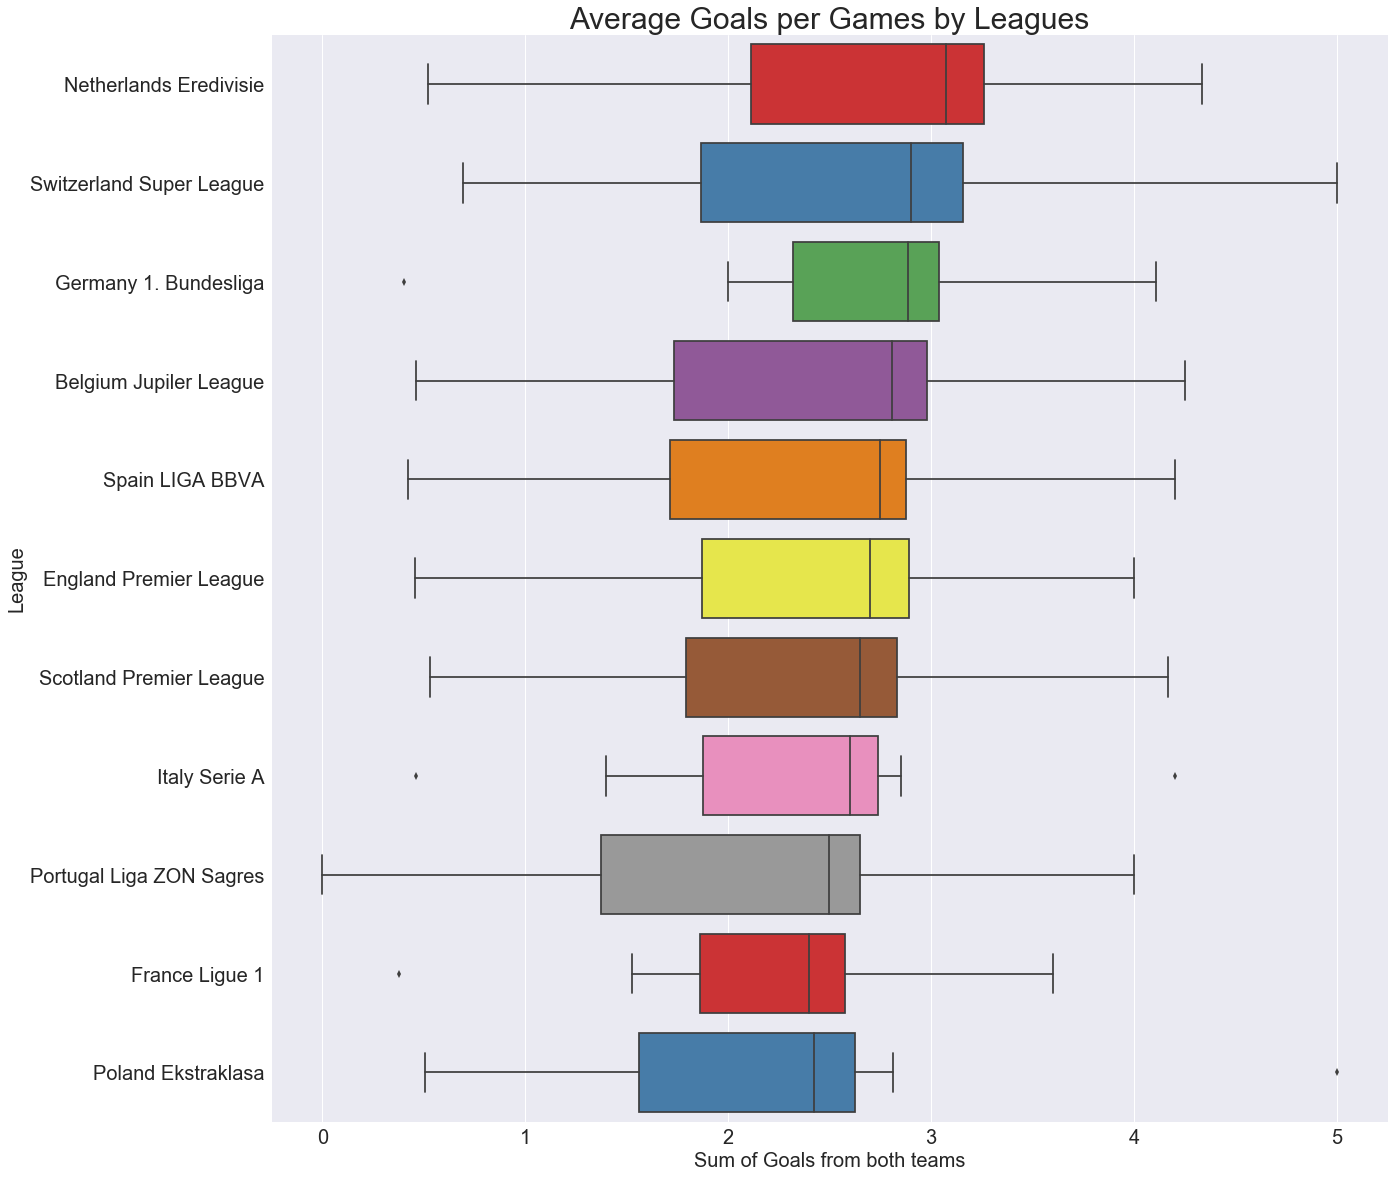

In [25]:
desc_avg_goals = desc_avg_goals.transpose()

sns.set(rc={'figure.figsize':(20,20)})
sns.set(font_scale=2)
ax = sns.boxplot(data=desc_avg_goals[2:], orient='h', palette='Set1')
ax.set_title('Average Goals per Games by Leagues', size=30)
ax.set_yticklabels(desc_avg_goals.iloc[0])
ax.set_xlabel('Sum of Goals from both teams', size=20)
ax.set_ylabel('League', size=20);


<a id='ob2'></a>
> ## Observation #2:

> **1) Netherlands scores the highest goals in average at 3.086 over the period.**

> **2) In the second place, Switzerland and Germany score almost the same around at 2.9.**

> **3) On the other hand, Poland scores the lowest goals at 2.424 similar with France.**

***

<a id='res3'></a>
> # < Research Question 3: The More Games, The Better Scores?? >

> **Q. Are average scores and a number of games played related to each other?**

> ## **Methodology**

> **I summed up all games played per each year and then compared it with average scores.**

In [26]:
# Total number of games by leagues per season.
df_match_cnt = df_match_new.copy()

df_match_cnt['date'] = pd.to_datetime(df_match_cnt['date'])
df_match_cnt.set_index(pd.DatetimeIndex(df_match_cnt['date']), inplace=True)

df_match_cnt = df_match_cnt.groupby(['league']).resample('Y').count().iloc[:,[0]]
df_match_cnt.columns=['games_played']


# Average goal scores by leagues per season.
df_match_cnt1 = df_match_new.copy()

df_match_cnt1['date'] = pd.to_datetime(df_match_cnt1['date'])
df_match_cnt1.set_index(pd.DatetimeIndex(df_match_cnt1['date']), inplace=True)

df_match_cnt1 = df_match_cnt1.groupby(['league']).resample('Y').mean().iloc[:,[0]]
df_match_cnt1.columns=['goals']

# Joining two information into a dataframe, the number of games and average scores.
df_match_cnt1['games_played'] = df_match_cnt['games_played']
avg = df_match_cnt1.unstack().transpose().loc['goals']
games = df_match_cnt1.unstack().transpose().loc['games_played']
avg.head()

league,Belgium Jupiler League,England Premier League,France Ligue 1,Germany 1. Bundesliga,Italy Serie A,Netherlands Eredivisie,Poland Ekstraklasa,Portugal Liga ZON Sagres,Scotland Premier League,Spain LIGA BBVA,Switzerland Super League
date,,,,,,,,,,,
2008-12-31,1.712418,1.373737,1.257895,1.777778,1.550296,1.901961,1.352941,1.145833,1.381356,1.700000,1.632184
2009-12-31,1.521886,1.592593,1.358090,1.535948,1.485411,1.603226,1.300000,1.320312,1.344340,1.618919,1.939891
2010-12-31,1.627193,1.590909,1.335958,1.666667,1.498688,1.841772,1.379464,1.429167,1.395652,1.620513,1.755556
2011-12-31,1.573913,1.631300,1.442408,1.630719,1.469169,1.982877,1.359375,1.362069,1.364372,1.628947,1.555556
2012-12-31,1.719697,1.613811,1.476316,1.594771,1.552910,1.765079,1.263393,1.476190,1.407895,1.694872,1.370370


In [27]:
games

league,Belgium Jupiler League,England Premier League,France Ligue 1,Germany 1. Bundesliga,Italy Serie A,Netherlands Eredivisie,Poland Ekstraklasa,Portugal Liga ZON Sagres,Scotland Premier League,Spain LIGA BBVA,Switzerland Super League
date,,,,,,,,,,,
2008-12-31,153.0,198.0,190.0,153.0,169.0,153.0,136.0,96.0,118.0,160.0,87.0
2009-12-31,297.0,378.0,377.0,306.0,377.0,310.0,240.0,256.0,212.0,370.0,183.0
2010-12-31,228.0,374.0,381.0,306.0,381.0,316.0,224.0,240.0,230.0,390.0,180.0
2011-12-31,230.0,377.0,382.0,306.0,373.0,292.0,256.0,232.0,247.0,380.0,180.0
2012-12-31,264.0,391.0,380.0,306.0,378.0,315.0,224.0,231.0,228.0,390.0,162.0
2013-12-31,64.0,372.0,379.0,305.0,370.0,306.0,288.0,257.0,216.0,380.0,179.0
2014-12-31,179.0,380.0,380.0,307.0,370.0,297.0,224.0,254.0,225.0,369.0,181.0
2015-12-31,241.0,380.0,381.0,306.0,388.0,306.0,256.0,306.0,240.0,390.0,180.0
2016-12-31,72.0,190.0,190.0,153.0,211.0,153.0,72.0,180.0,108.0,211.0,90.0


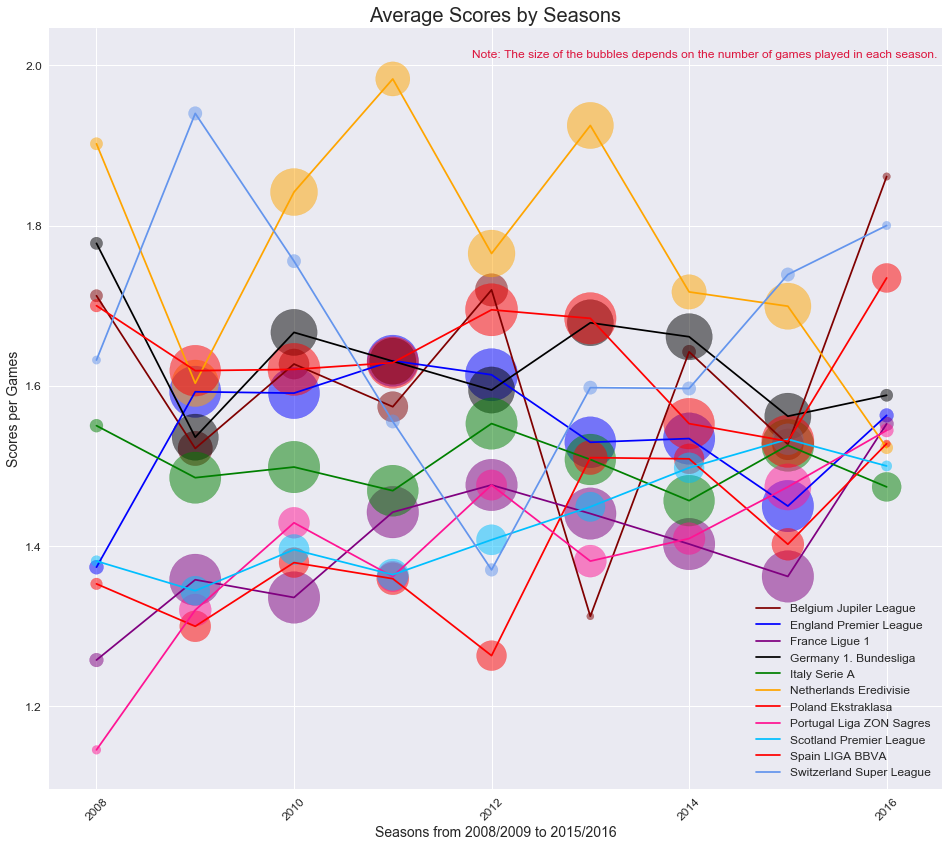

In [28]:
colors = ['maroon','Blue','Purple','Black','Green','Orange','Red','deeppink','deepskyblue','Red','cornflowerblue']

ax = avg.plot(figsize=(16,14),color=colors)
ax.legend(markerscale=0.3, fontsize=12)

x = avg.index
for i in range(len(avg.columns)):
    ss = games.iloc[:,i]
    y = y = avg.iloc[:,i]
    c = colors[i]
    
    size = ss.apply(lambda x: 0.8*x if x<100 else(x if ((x<200) & (x>=100)) \
                                                  else (x*4 if ((x<300)&(x>=200)) else x*7)))
    
    plt.scatter(x,y,s=size, alpha=0.5, color=c)

xticks(rotation=45, fontsize=12)
yticks(fontsize=12)
plt.grid(axis='both')
plt.xlabel('Seasons from 2008/2009 to 2015/2016', size=14)
plt.ylabel('Scores per Games', size=14)
plt.title('Average Scores by Seasons', size=20)
plt.text(41.8, 2.01, 'Note: The size of the bubbles depends on the number of games played in each season.'\
         , fontsize=12, color='#DC143C')
plt.grid()

plt.show();

<a id='ob3'></a>
> ## Observation #3:

> **1) How many goals they're scoring doesn't look quite related to how many games they play.**

> **2) The number of games seems pretty steady for each country.**

> **3) Next Question? : Maybe teams or players' own abilities are affecting how many goals are scored, then what attributes are ?**

***

> ## **Dataframe: df_player**

In [29]:
df_player.info()
print('\n')
df_player.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB




,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [30]:
df_player['birthdate'] = pd.to_datetime(df_player['birthday'])
now = pd.Timestamp(datetime.datetime.now())
df_player['age'] = (now - df_player['birthdate']).astype('<m8[Y]')
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,birthdate,age
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1992-02-29,26.0
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,1989-12-15,28.0
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163,1991-05-13,27.0
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198,1982-05-08,36.0
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154,1979-11-08,38.0


***

> ## **Dataframe: df_player_attributes**
**Leauge and Country Mapping**

In [31]:
df_player_attributes = whole_df[5]

In [32]:
df_player_attributes.info()
print('\n')
df_player_attributes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [33]:
df_player_attributes.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [34]:
# Total number of games each player's played

ttl_num_games = df_player_attributes.groupby('player_fifa_api_id').count()[['id']]
ttl_num_games.rename(columns={'id':'number_of_games'}, inplace=True)
ttl_num_games.head()
ttl_num_games.reset_index(inplace=True)

In [35]:
df_players = df_player_attributes.groupby('player_fifa_api_id').mean()
df_players.drop(['id','player_api_id'], axis=1, inplace=True, errors='ignore')
df_players.reset_index(inplace=True)
df_players.head()

,player_fifa_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,2,70.600000,71.100000,74.100000,48.033333,62.800000,71.200000,56.566667,66.600000,67.733333,...,55.766667,59.766667,71.466667,74.000000,72.833333,13.300000,7.633333,26.000000,11.766667,13.466667
1,6,72.125000,76.250000,18.000000,18.000000,24.000000,28.750000,6.500000,17.000000,7.250000,...,42.000000,25.250000,24.750000,24.125000,17.000000,71.750000,72.375000,71.000000,75.250000,72.750000
2,11,67.352941,69.411765,63.588235,54.352941,60.882353,71.882353,64.470588,67.117647,69.058824,...,68.882353,68.117647,45.117647,49.588235,58.941176,6.000000,7.058824,13.941176,7.470588,11.882353
3,16,74.125000,76.562500,74.187500,73.937500,64.000000,68.750000,72.625000,76.125000,77.562500,...,59.875000,75.750000,27.062500,31.062500,21.000000,9.250000,13.625000,24.250000,12.937500,12.562500
4,27,76.500000,77.600000,80.933333,69.833333,49.833333,80.133333,76.833333,82.333333,83.333333,...,81.366667,67.700000,37.133333,36.200000,29.333333,8.333333,7.666667,21.766667,16.033333,8.333333


In [36]:
whole_info_players = pd.merge(left=df_players, right=ttl_num_games, on='player_fifa_api_id', how='left')
whole_info_players.head()

,player_fifa_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,number_of_games
0,2,70.600000,71.100000,74.100000,48.033333,62.800000,71.200000,56.566667,66.600000,67.733333,...,59.766667,71.466667,74.000000,72.833333,13.300000,7.633333,26.000000,11.766667,13.466667,30
1,6,72.125000,76.250000,18.000000,18.000000,24.000000,28.750000,6.500000,17.000000,7.250000,...,25.250000,24.750000,24.125000,17.000000,71.750000,72.375000,71.000000,75.250000,72.750000,8
2,11,67.352941,69.411765,63.588235,54.352941,60.882353,71.882353,64.470588,67.117647,69.058824,...,68.117647,45.117647,49.588235,58.941176,6.000000,7.058824,13.941176,7.470588,11.882353,17
3,16,74.125000,76.562500,74.187500,73.937500,64.000000,68.750000,72.625000,76.125000,77.562500,...,75.750000,27.062500,31.062500,21.000000,9.250000,13.625000,24.250000,12.937500,12.562500,16
4,27,76.500000,77.600000,80.933333,69.833333,49.833333,80.133333,76.833333,82.333333,83.333333,...,67.700000,37.133333,36.200000,29.333333,8.333333,7.666667,21.766667,16.033333,8.333333,30


In [37]:
whole_info_players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11062 entries, 0 to 11061
Data columns (total 37 columns):
player_fifa_api_id    11062 non-null int64
overall_rating        11060 non-null float64
potential             11060 non-null float64
crossing              11060 non-null float64
finishing             11060 non-null float64
heading_accuracy      11060 non-null float64
short_passing         11060 non-null float64
volleys               10582 non-null float64
dribbling             11060 non-null float64
curve                 10582 non-null float64
free_kick_accuracy    11060 non-null float64
long_passing          11060 non-null float64
ball_control          11060 non-null float64
acceleration          11060 non-null float64
sprint_speed          11060 non-null float64
agility               10582 non-null float64
reactions             11060 non-null float64
balance               10582 non-null float64
shot_power            11060 non-null float64
jumping               10582 non-null f

In [38]:
whole_info_players = check_null_value_by_row(whole_info_players)
whole_info_players.head()

There are 11062 rows in this dataset.

480 rows with null values have been removed.


,player_fifa_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,number_of_games
0,2,70.600000,71.100000,74.100000,48.033333,62.800000,71.200000,56.566667,66.600000,67.733333,...,59.766667,71.466667,74.000000,72.833333,13.300000,7.633333,26.000000,11.766667,13.466667,30
1,6,72.125000,76.250000,18.000000,18.000000,24.000000,28.750000,6.500000,17.000000,7.250000,...,25.250000,24.750000,24.125000,17.000000,71.750000,72.375000,71.000000,75.250000,72.750000,8
2,11,67.352941,69.411765,63.588235,54.352941,60.882353,71.882353,64.470588,67.117647,69.058824,...,68.117647,45.117647,49.588235,58.941176,6.000000,7.058824,13.941176,7.470588,11.882353,17
3,16,74.125000,76.562500,74.187500,73.937500,64.000000,68.750000,72.625000,76.125000,77.562500,...,75.750000,27.062500,31.062500,21.000000,9.250000,13.625000,24.250000,12.937500,12.562500,16
4,27,76.500000,77.600000,80.933333,69.833333,49.833333,80.133333,76.833333,82.333333,83.333333,...,67.700000,37.133333,36.200000,29.333333,8.333333,7.666667,21.766667,16.033333,8.333333,30


In [39]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,birthdate,age
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1992-02-29,26.0
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,1989-12-15,28.0
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163,1991-05-13,27.0
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198,1982-05-08,36.0
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154,1979-11-08,38.0


In [40]:
whole_info_players.head()

,player_fifa_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,number_of_games
0,2,70.600000,71.100000,74.100000,48.033333,62.800000,71.200000,56.566667,66.600000,67.733333,...,59.766667,71.466667,74.000000,72.833333,13.300000,7.633333,26.000000,11.766667,13.466667,30
1,6,72.125000,76.250000,18.000000,18.000000,24.000000,28.750000,6.500000,17.000000,7.250000,...,25.250000,24.750000,24.125000,17.000000,71.750000,72.375000,71.000000,75.250000,72.750000,8
2,11,67.352941,69.411765,63.588235,54.352941,60.882353,71.882353,64.470588,67.117647,69.058824,...,68.117647,45.117647,49.588235,58.941176,6.000000,7.058824,13.941176,7.470588,11.882353,17
3,16,74.125000,76.562500,74.187500,73.937500,64.000000,68.750000,72.625000,76.125000,77.562500,...,75.750000,27.062500,31.062500,21.000000,9.250000,13.625000,24.250000,12.937500,12.562500,16
4,27,76.500000,77.600000,80.933333,69.833333,49.833333,80.133333,76.833333,82.333333,83.333333,...,67.700000,37.133333,36.200000,29.333333,8.333333,7.666667,21.766667,16.033333,8.333333,30


In [41]:
# Merging two dataframes on 'player_fifa_api_id'.

all_plr_info = pd.merge(left=df_player, right=whole_info_players, on='player_fifa_api_id', how='left')
all_plr_info.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,birthdate,age,overall_rating,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,number_of_games
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1992-02-29,26.0,63.600000,...,47.600000,63.800000,66.000000,67.800000,5.600000,10.600000,9.600000,7.600000,7.600000,5.0
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,1989-12-15,28.0,66.969697,...,53.121212,69.393939,68.787879,71.515152,12.181818,8.666667,14.242424,10.363636,12.909091,33.0
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163,1991-05-13,27.0,67.000000,...,60.538462,22.038462,21.115385,21.346154,14.038462,11.807692,17.730769,10.115385,13.500000,26.0
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198,1982-05-08,36.0,69.086957,...,41.739130,70.608696,70.652174,68.043478,14.173913,11.173913,22.869565,11.173913,10.173913,23.0
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154,1979-11-08,38.0,73.240000,...,52.960000,77.600000,76.040000,74.600000,8.280000,8.320000,24.920000,12.840000,11.920000,25.0


In [42]:
all_plr_info.describe()

,id,player_api_id,player_fifa_api_id,height,weight,age,overall_rating,potential,crossing,finishing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,number_of_games
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,10582.000000,10582.000000,10582.000000,10582.000000,...,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000
mean,5537.511392,156582.427215,165664.910488,181.867445,168.380289,30.827848,66.883061,72.124918,52.924873,47.873222,...,53.389938,46.116013,49.375659,47.131852,14.958130,16.331939,21.530720,16.406330,16.718391,17.199301
std,3197.692647,160713.700624,58649.928360,6.369201,14.990217,5.457497,6.173601,5.733254,16.208089,18.158532,...,13.832901,20.050622,20.369817,20.590028,16.797796,15.476486,16.293339,15.698238,16.795922,9.220732
min,1.000000,2625.000000,2.000000,157.480000,117.000000,19.000000,43.750000,51.000000,6.000000,5.000000,...,9.000000,5.000000,6.000000,5.000000,1.833333,2.000000,3.260870,2.000000,2.000000,2.000000
25%,2767.750000,35555.500000,151889.500000,177.800000,159.000000,27.000000,62.901190,68.040210,43.521739,32.407143,...,44.466667,25.000000,28.900000,25.439236,7.824169,9.313322,11.000000,9.312500,9.250000,9.000000
50%,5536.500000,96619.500000,184671.000000,182.880000,168.000000,30.000000,66.777778,72.060662,56.508621,50.000000,...,54.711310,49.892857,55.154705,52.200000,10.200000,12.234314,15.422065,12.250000,12.222222,17.000000
75%,8306.250000,212470.500000,203883.250000,185.420000,179.000000,35.000000,70.954891,76.000000,64.800000,63.134531,...,63.618132,64.129076,67.000000,65.125000,13.000000,15.000000,25.068391,15.000000,15.000000,24.000000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000,51.000000,92.192308,95.230769,89.357143,92.230769,...,89.565217,89.666667,90.200000,94.366667,89.863636,86.875000,87.133333,91.625000,90.954545,96.000000


In [43]:
all_plr_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11060 entries, 0 to 11059
Data columns (total 45 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
birthdate             11060 non-null datetime64[ns]
age                   11060 non-null float64
overall_rating        10582 non-null float64
potential             10582 non-null float64
crossing              10582 non-null float64
finishing             10582 non-null float64
heading_accuracy      10582 non-null float64
short_passing         10582 non-null float64
volleys               10582 non-null float64
dribbling             10582 non-null float64
curve                 10582 non-null float64
free_kick_accuracy    10582 non-null float64
long_passing          10582 non-null fl

***

<a id='res4'></a>
> # < Research Question4: Inactive Players>

> **Q. Are players who didn't play any game different with the rest of other players?**

> ## **Methodology**

> **After extracting the information from the players with zero game and then compare with others.**

In [44]:
# There are some players who didn't play any game over the period. 
# So these players would be separated to another dataframe, called 'zero_plr'

zero_plr = all_plr_info[all_plr_info['overall_rating'].isnull()]
zero_plr = check_null_value(zero_plr)
zero_plr.info()

There are 478 rows in this dataset.

36 columns with null values have been removed.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 25 to 11027
Data columns (total 9 columns):
id                    478 non-null int64
player_api_id         478 non-null int64
player_name           478 non-null object
player_fifa_api_id    478 non-null int64
birthday              478 non-null object
height                478 non-null float64
weight                478 non-null int64
birthdate             478 non-null datetime64[ns]
age                   478 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 37.3+ KB


In [45]:
zero_plr.describe()

,id,player_api_id,player_fifa_api_id,height,weight,age
count,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000
mean,5600.654812,48040.598326,103691.240586,181.381506,167.887029,38.014644
std,3254.804851,41541.741748,72152.254318,5.927388,14.223132,4.770827
min,26.000000,3263.000000,245.000000,165.100000,128.000000,27.000000
25%,2654.750000,26576.750000,18492.500000,177.800000,159.000000,35.000000
50%,5573.500000,34253.000000,136937.000000,180.340000,168.000000,38.000000
75%,8453.750000,42138.000000,169141.250000,185.420000,176.000000,42.000000
max,11043.000000,359194.000000,194951.000000,203.200000,212.000000,51.000000


In [46]:
all_plr_info = check_null_value_by_row(all_plr_info)


There are 11060 rows in this dataset.

478 rows with null values have been removed.


In [47]:
all_plr_info[['age']].describe()

,age
count,10582.000000
mean,30.503213
std,5.259753
min,19.000000
25%,26.000000
50%,30.000000
75%,34.000000
max,49.000000


<a id='ob4'></a>
> ## Observation #4:

> **1) Average age is quite different between players in active & inactive.**

> **2) 38 years old(inactive) vs 30 years old(active)**

***

<a id='res5'></a>
> ## < Research Question5: Physical Conditions Enhance Players' Abilities?>

> **Q. Are players who didn't play any game different with the rest of other players?**

> ## **Methodology**

> **After extracting the information from the players with zero game and then compare with others.**

In [48]:
all_plr_info.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,birthdate,age,overall_rating,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,number_of_games
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1992-02-29,26.0,63.600000,...,47.600000,63.800000,66.000000,67.800000,5.600000,10.600000,9.600000,7.600000,7.600000,5.0
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,1989-12-15,28.0,66.969697,...,53.121212,69.393939,68.787879,71.515152,12.181818,8.666667,14.242424,10.363636,12.909091,33.0
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163,1991-05-13,27.0,67.000000,...,60.538462,22.038462,21.115385,21.346154,14.038462,11.807692,17.730769,10.115385,13.500000,26.0
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198,1982-05-08,36.0,69.086957,...,41.739130,70.608696,70.652174,68.043478,14.173913,11.173913,22.869565,11.173913,10.173913,23.0
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154,1979-11-08,38.0,73.240000,...,52.960000,77.600000,76.040000,74.600000,8.280000,8.320000,24.920000,12.840000,11.920000,25.0


In [49]:
useful_info = all_plr_info.drop(['id','player_api_id','player_fifa_api_id','birthdate'], axis=1)
useful_info.describe()

,height,weight,age,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,number_of_games
count,10582.000000,10582.00000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,...,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000
mean,181.889395,168.40257,30.503213,66.883061,72.124918,52.924873,47.873222,56.042183,60.447657,47.111253,...,53.389938,46.116013,49.375659,47.131852,14.958130,16.331939,21.530720,16.406330,16.718391,17.199301
std,6.387826,15.02420,5.259753,6.173601,5.733254,16.208089,18.158532,15.630905,13.479535,17.340928,...,13.832901,20.050622,20.369817,20.590028,16.797796,15.476486,16.293339,15.698238,16.795922,9.220732
min,157.480000,117.00000,19.000000,43.750000,51.000000,6.000000,5.000000,8.000000,10.571429,3.750000,...,9.000000,5.000000,6.000000,5.000000,1.833333,2.000000,3.260870,2.000000,2.000000,2.000000
25%,177.800000,159.00000,26.000000,62.901190,68.040210,43.521739,32.407143,49.149573,55.857143,33.250000,...,44.466667,25.000000,28.900000,25.439236,7.824169,9.313322,11.000000,9.312500,9.250000,9.000000
50%,182.880000,168.00000,30.000000,66.777778,72.060662,56.508621,50.000000,58.724747,63.000000,49.300000,...,54.711310,49.892857,55.154705,52.200000,10.200000,12.234314,15.422065,12.250000,12.222222,17.000000
75%,185.420000,179.00000,34.000000,70.954891,76.000000,64.800000,63.134531,66.714286,69.039615,60.740662,...,63.618132,64.129076,67.000000,65.125000,13.000000,15.000000,25.068391,15.000000,15.000000,24.000000
max,208.280000,243.00000,49.000000,92.192308,95.230769,89.357143,92.230769,93.111111,95.181818,90.789474,...,89.565217,89.666667,90.200000,94.366667,89.863636,86.875000,87.133333,91.625000,90.954545,96.000000


In [50]:
# Reorganizing the columns order.
cols = useful_info.columns.tolist()
new_cols = cols[:4] + cols[-1:] + cols[4:-1]
useful_info = useful_info[new_cols]
useful_info.head()

,player_name,birthday,height,weight,number_of_games,age,overall_rating,potential,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,5.0,26.0,63.600000,67.600000,48.600000,43.600000,...,53.600000,47.600000,63.800000,66.000000,67.800000,5.600000,10.600000,9.600000,7.600000,7.600000
1,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,33.0,28.0,66.969697,74.484848,70.787879,49.454545,...,57.454545,53.121212,69.393939,68.787879,71.515152,12.181818,8.666667,14.242424,10.363636,12.909091
2,Aaron Doran,1991-05-13 00:00:00,170.18,163,26.0,27.0,67.000000,74.192308,68.115385,57.923077,...,69.384615,60.538462,22.038462,21.115385,21.346154,14.038462,11.807692,17.730769,10.115385,13.500000
3,Aaron Galindo,1982-05-08 00:00:00,182.88,198,23.0,36.0,69.086957,70.782609,57.217391,26.260870,...,53.782609,41.739130,70.608696,70.652174,68.043478,14.173913,11.173913,22.869565,11.173913,10.173913
4,Aaron Hughes,1979-11-08 00:00:00,182.88,154,25.0,38.0,73.240000,74.680000,45.080000,38.840000,...,46.480000,52.960000,77.600000,76.040000,74.600000,8.280000,8.320000,24.920000,12.840000,11.920000


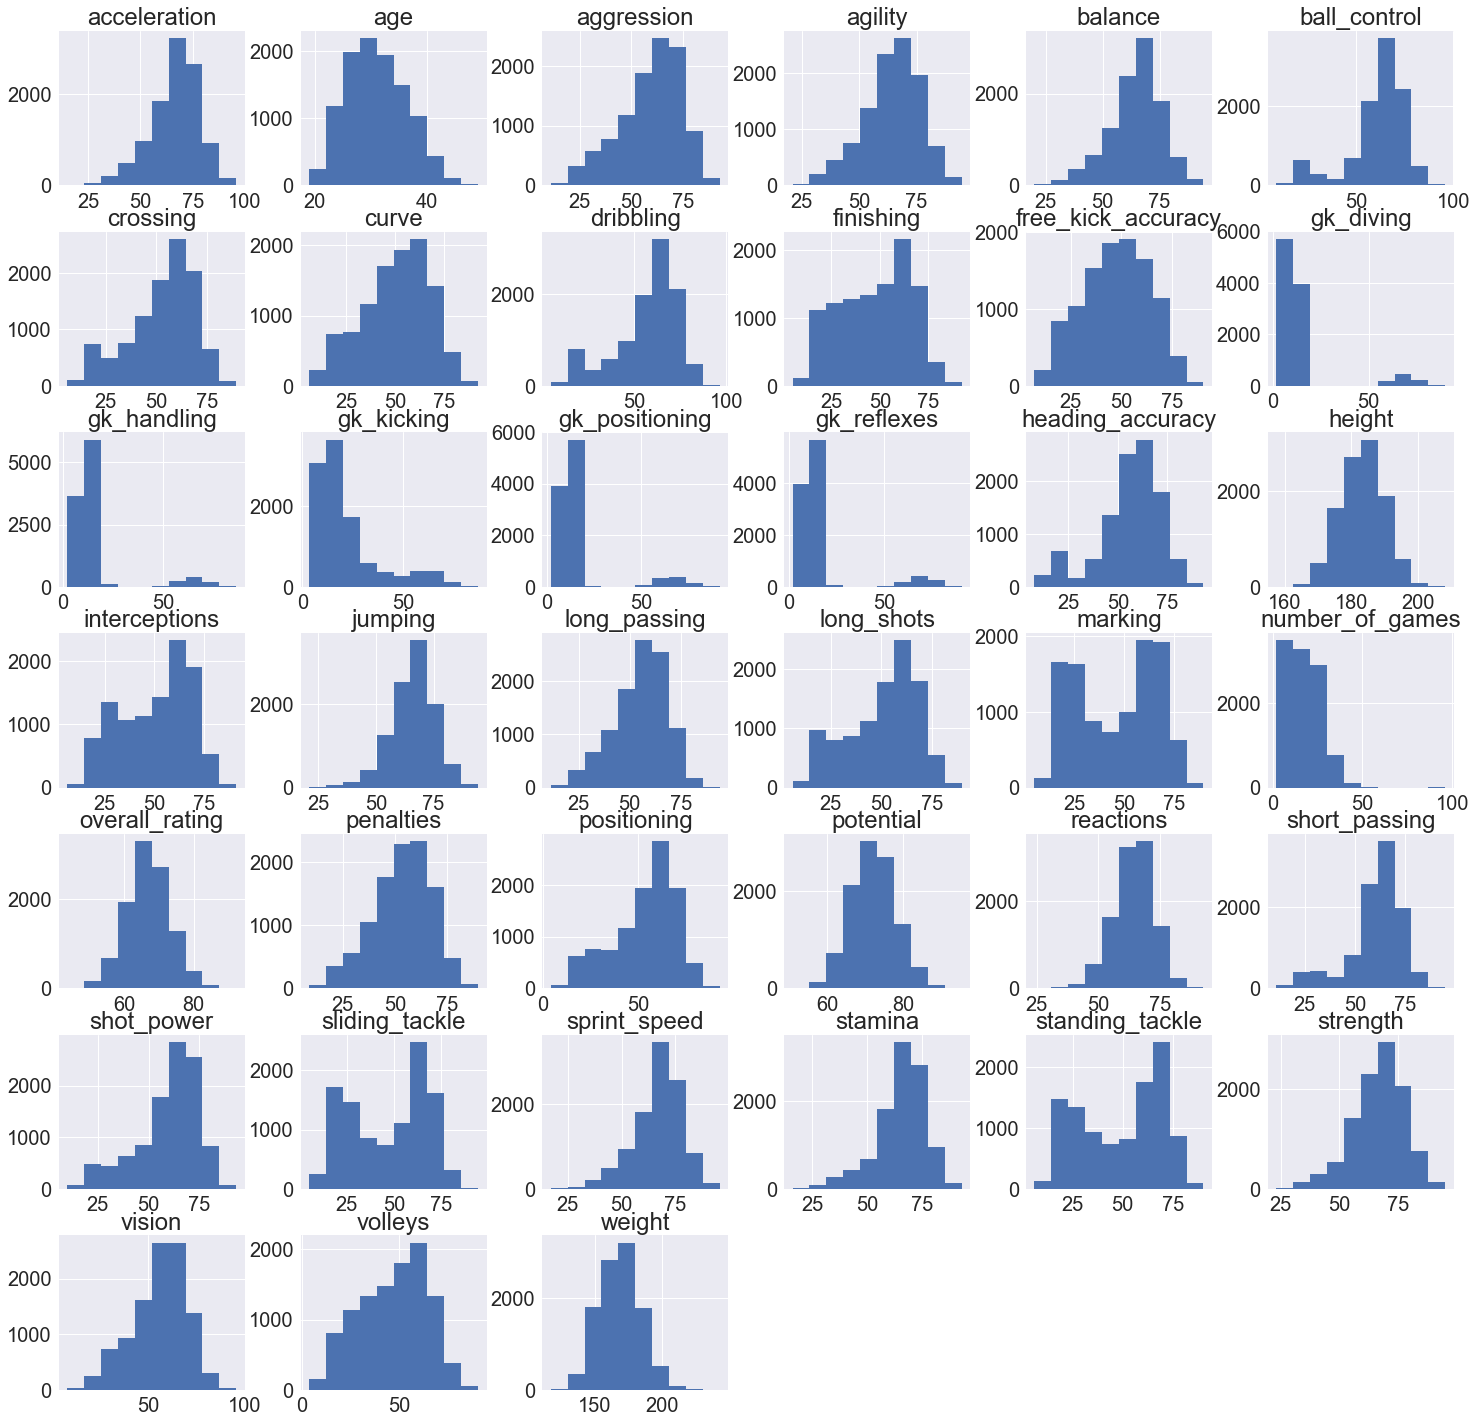

In [51]:
useful_info.hist(figsize=(25,25))
plt.show();

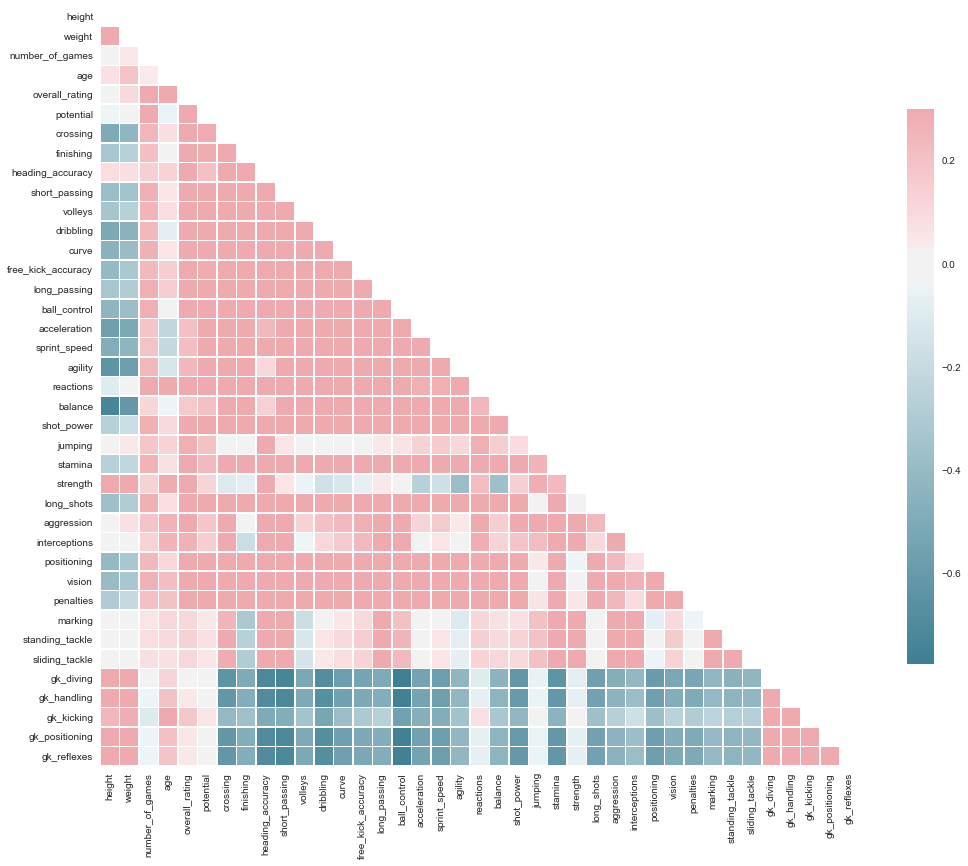

In [52]:
sns.set(style="white")

d = useful_info

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(17, 17))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .6})



<a id='ob5'></a>
> ## Observation #5:

> **1) Physical conditions like height and weight are important for goalkeepers.**

> **2) The other players besides goalkeepers are rather better be short.**

***

<a id='conc'></a>
> ## Conclusions

> **Exploring the data**

> - Q1. I'd like to know how much more is home teams likely to win over away teams.

>  - **The possibility of winning for home teams is 46% in average. Home game appears to be a benefit to home teams.**

> - Q2. Which country scores more in average per game?

>  - **Netherlands > Switzerland > Germany > Belgium > Spain > England > Scotland > Italy > Portugal > France > Poland**

> - Q3. If a team played more games then do they score more, or the other way around?

>  - **The number of games played doesn't seem to be related to the scores they make in average.**

> - Q4. Why some players have no games?

>  - **Inactive players are 8 years older than active ones in average.**

> - Q5. Do Goalkeepers actually tend to be taller and bigger than other players?

>  - **Goalkeepers capabilities are hightly correlated to height and weight.**


In [54]:
df_team_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootin

In [58]:
df_team_attributes['team_api_id'].nunique()

288

In [60]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [ ]:
# put the vectors with one value like maximum, mean, or minimum to build the model.